In [29]:
import pandas as pd
import datetime

import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
dt = pd.read_csv('data/un_dia_ecobici_agregada.csv',index_col = 0,parse_dates=True)
dt.head()

,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,sospechosa,max_bicis_sistema
timestamp_consulta,,,,,,
2019-07-19 00:31:02.847471-03:00,1296,1066,5164,91,1.0,1551
2019-07-19 01:01:04.187908-03:00,1288,1072,5166,86,1.0,1551
2019-07-19 01:31:09.091072-03:00,1356,1051,5120,88,1.0,1551
2019-07-19 02:01:12.404074-03:00,1391,1039,5098,90,1.0,1551
2019-07-19 02:31:14.098947-03:00,1435,1023,5070,88,2.0,1551


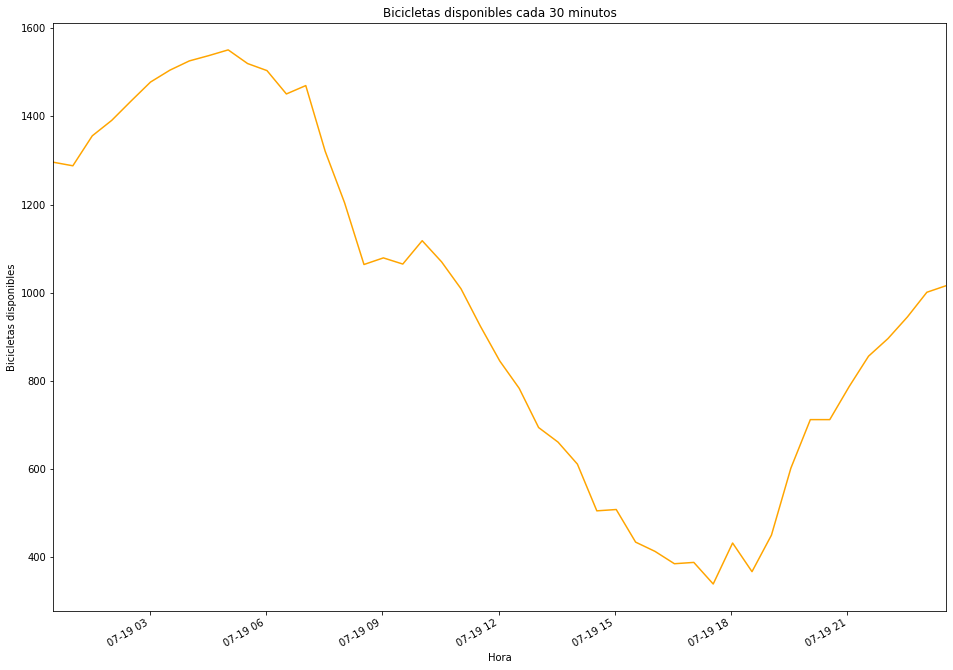

In [60]:
f,ax=plt.subplots(figsize=(16,12))
dt.num_bikes_available.plot(ax=ax, color = 'orange')
ax.set_xlabel('Hora')
ax.set_ylabel('Bicicletas disponibles')
ax.set_title('Bicicletas disponibles cada 30 minutos')
f.savefig('disponibles.png')

In [57]:
dt['disabled_p']=(dt.num_bikes_disabled / dt.max_bicis_sistema * 100)
dt.head()

,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,sospechosa,max_bicis_sistema,disabled_p
timestamp_consulta,,,,,,,
2019-07-19 00:31:02.847471-03:00,1296,1066,5164,91,1.0,1551,68.729852
2019-07-19 01:01:04.187908-03:00,1288,1072,5166,86,1.0,1551,69.116699
2019-07-19 01:31:09.091072-03:00,1356,1051,5120,88,1.0,1551,67.762734
2019-07-19 02:01:12.404074-03:00,1391,1039,5098,90,1.0,1551,66.989039
2019-07-19 02:31:14.098947-03:00,1435,1023,5070,88,2.0,1551,65.957447


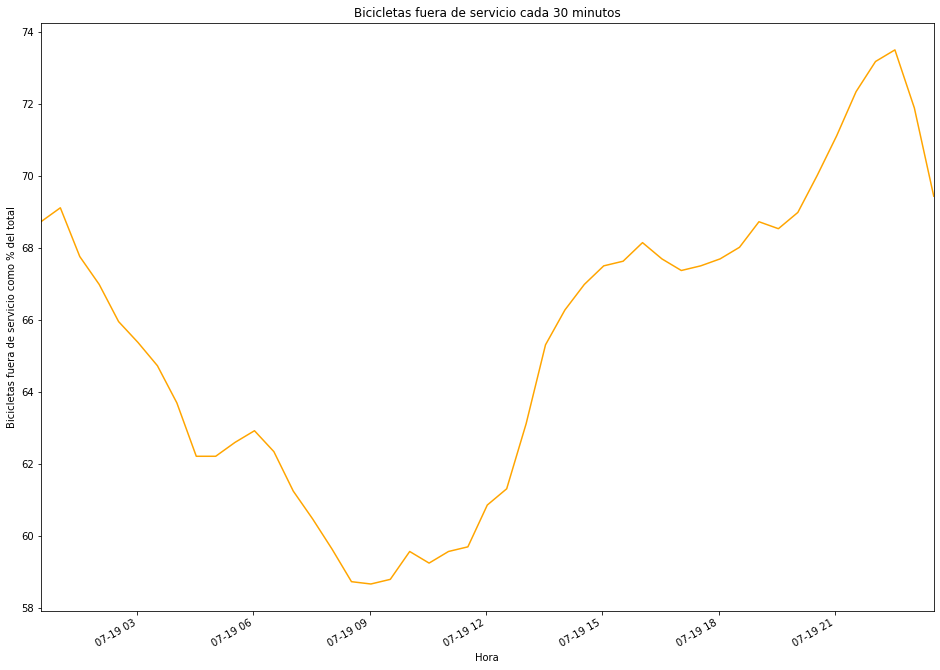

In [61]:
f,ax=plt.subplots(figsize=(16,12))

dt.disabled_p.plot(ax=ax,color='orange')
ax.set_xlabel('Hora')
ax.set_ylabel('Bicicletas fuera de servicio como % del total')
ax.set_title('Bicicletas fuera de servicio cada 30 minutos')
f.savefig('fuera.png')